#5.텍스트 데이터 분석

## 5.1 텍스트 전처리

### 5.1.1 토큰화 (Tokenization)
주어진 코퍼스 내에서 분석 대상이 되는 유의한 단위인 토큰으로 나누는 작업 <br>
아래 예시에서 토큰은 단어
<br>

ex)
I like apple <br>
-> token: I, like, apple

<br>

주의사항: 단순히 특수문자 등을 제외하고 공백 기준으로 잘라내는 작업이라고는 할 수 없음 <br>
> ex) 
- 36.5, Ph.D, AT&T <br>
- 줄임말
- 야민정음
- 기타



### 5.1.2 정제 (Cleaning)
가지고 있는 단어 집합에서 불필요한 데이터를 제거하는 것 <br>
토큰화 작업 전후로 적용 <br>

> example
- 등장 빈도가 적은 단어
- 길이가 짧은 단어

### 5.1.3 정규화 (Normalization)
표현방법이 다른 단어를 하나의 단어로 통합

> example
- 대소문자 (covid == COVID)
- 동의어 (covid == 코로나)

#### 표제어 추출 (Lemmatization)
단어의 어근을 찾아 추출

> example
- am, are, is -> be
- apples -> apple


### 5.1.4 불용어 (Stopword)

가지고 있는 데이터 중 불필요한 토큰을 제거하는 작업 <br>
자주 등장하지만 분석에 큰 도움이 되지 않는 단어를 의미 <br>

> example <br>
- and, am, I, about 

<br>

```python
# 영문 불용어
from nltk.corpus import stopwords

stop_words_list = stopwords.words('english')
[word for word in word_tokens if word not in stop_words]

# 한국어 불용어
# https://www.ranks.nl/stopwords/korean
```

## 5.2 텍스트 데이터 분석

### 5.2.1 WordCloud
데이터의 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표시하는 것 <br>
주로 단어의 빈도를 이용하며, 중요도에 따라 글자의 색상이나 굵기 등 형태를 변화시킬 수 있음
<br>

```python
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(word_list)

word_cloud = WordCloud(
    # font_path = "malgun" # 한글 입력 시 반드시 지정해야 함
    background_color="black", 
    max_font_size=60,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```
<br>

아래의 방법을 통해 특정 이미지 모양으로 시각화 가능
```python
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('./data/heart.png')
mask = np.array(image)

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism',
    mask=mask,
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```

In [27]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [102]:
import re
import itertools
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [1]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

In [2]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsumg smart phone',
 'I hate phone']

In [8]:
for document in documents :
    print(re.split('\s', document))

['I', 'like', 'apple', 'and', 'also', 'like', 'samsung']
['I', 'like', 'apple', 'watch']
['I', 'do', 'like', 'samsumg', 'smart', 'phone']
['I', 'hate', 'phone']


In [9]:
splitted_documents = [ re.split('\s', document) for document in documents ]

In [10]:
splitted_documents

[['I', 'like', 'apple', 'and', 'also', 'like', 'samsung'],
 ['I', 'like', 'apple', 'watch'],
 ['I', 'do', 'like', 'samsumg', 'smart', 'phone'],
 ['I', 'hate', 'phone']]

In [13]:
words = []
for splitted_document in splitted_documents :
    words.extend(splitted_document)
words

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsumg',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [12]:
' '.join(documents)

'I like apple and also like samsung I like apple watch I do like samsumg smart phone I hate phone'

In [11]:
re.split('\s', ' '.join(documents))

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsumg',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [15]:
itertools.chain(*splitted_documents)

In [16]:
list(itertools.chain(*splitted_documents))

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsumg',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [18]:
words = list(itertools.chain(*splitted_documents))
words

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsumg',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [19]:
set(words)

{'I',
 'also',
 'and',
 'apple',
 'do',
 'hate',
 'like',
 'phone',
 'samsumg',
 'samsung',
 'smart',
 'watch'}

In [21]:
word_count = dict()
set(words)

{'I',
 'also',
 'and',
 'apple',
 'do',
 'hate',
 'like',
 'phone',
 'samsumg',
 'samsung',
 'smart',
 'watch'}

In [22]:
words.count('I')

4

In [23]:
word_count = dict()
for word in set(words):
    word_count.update({
        word: words.count(word)
    })
word_count

{'like': 4,
 'apple': 2,
 'I': 4,
 'samsumg': 1,
 'phone': 2,
 'and': 1,
 'hate': 1,
 'watch': 1,
 'smart': 1,
 'do': 1,
 'samsung': 1,
 'also': 1}

In [25]:
Counter(words)

# 카운터 안에 들어가야 하는 워즈는 1차원 리스트임. 그래서 우리가 피고서 온 것.


Counter({'I': 4,
         'like': 4,
         'apple': 2,
         'and': 1,
         'also': 1,
         'samsung': 1,
         'watch': 1,
         'do': 1,
         'samsumg': 1,
         'smart': 1,
         'phone': 2,
         'hate': 1})

In [26]:
word_count = Counter(words)

In [31]:
word_cloud = WordCloud(
    colormap='prism',
    max_font_size=100
).generate_from_frequencies(word_count)

In [32]:
word_cloud

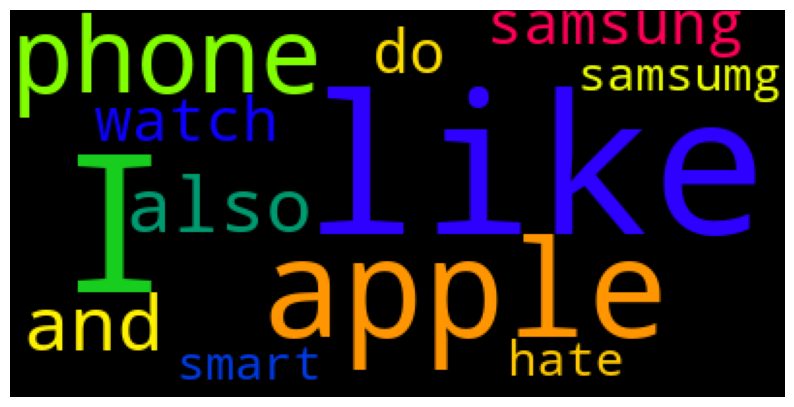

In [34]:
plt.figure(figsize=(10,8))
plt.axis('off') # 축 정보 없애기
plt.imshow(word_cloud)
plt.show()

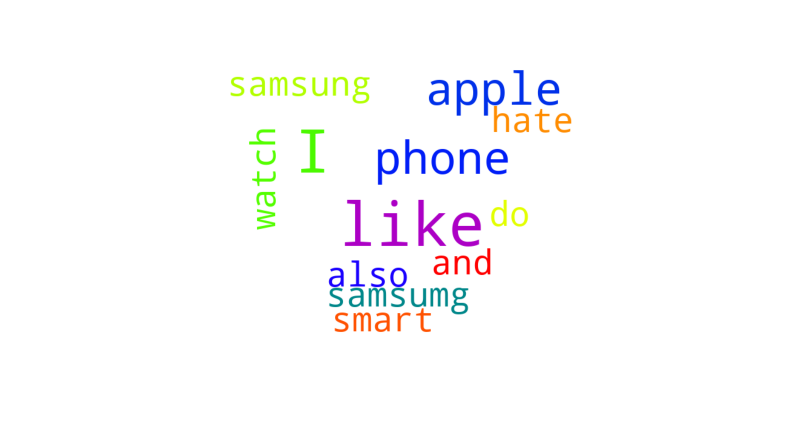

In [47]:
image = Image.open(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\MMM coding\heart.jpg')
mask = np.array(image)

word_cloud = WordCloud(
    width=600,
    height=600,
    colormap='prism',
    max_font_size=100,
    mask=mask,
    background_color='white'
).generate_from_frequencies(word_count)

plt.figure(figsize=(10,8))
plt.axis('off') # 축 정보 없애기
plt.imshow(word_cloud)
plt.show()


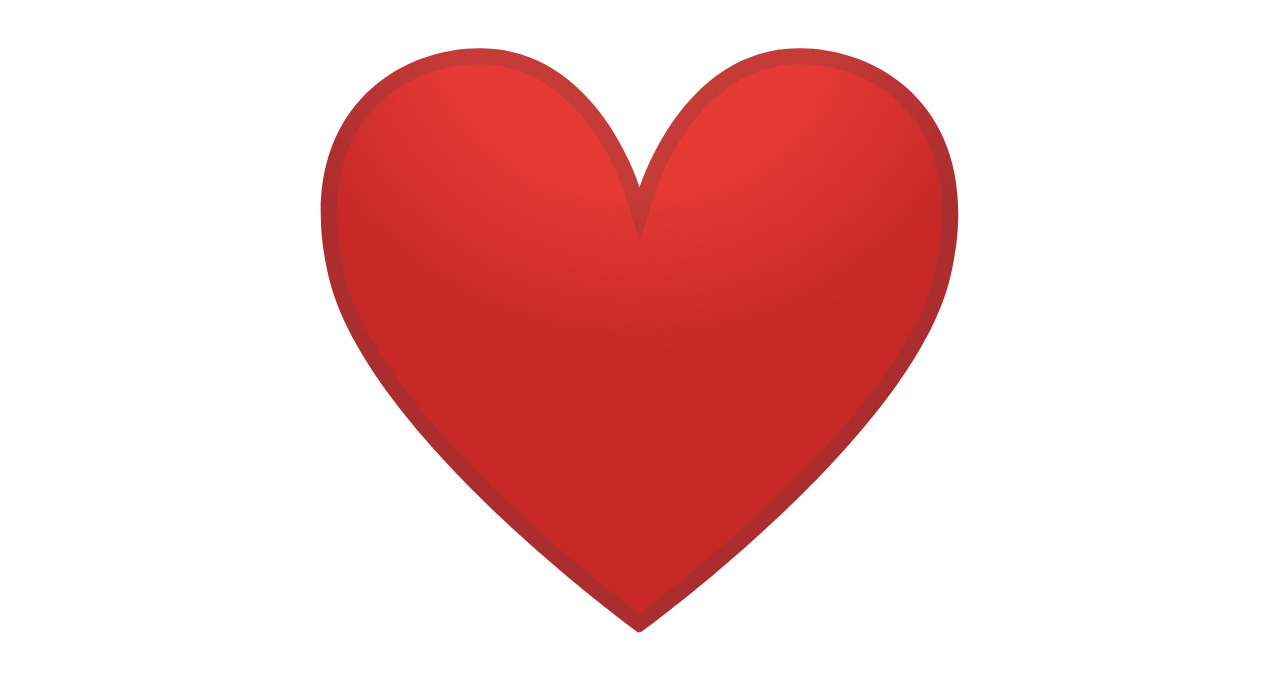

In [49]:
image

### 5.2.2 TF-IDF
TF-IDF는 단어 빈도와 역 문서 빈도를 사용하여 문서 단어 행렬(DTM) 내의 각 단어 

#### 문서 단어 행렬 (Document-Term Matrix, DTM)
다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현한 것

문서1: I like apple and also like samsung<br>
문서2: I like apple watch <br>
문서3: I do like samsumg smart phone <br>
문서4: I hate phone <br>
<br>

|문서|I|like|do|hate|apple|watch|samsung|smart|phone|and|also
|-|-|-|-|-|-|-|-|-|-|-|-|
|문서1|1|2|0|0|1|0|1|0|0|1|1|
|문서2|1|1|0|0|1|1|0|0|0|0|0|
|문서3|1|1|1|0|0|0|1|1|1|0|0|
|문서4|1|0|0|1|0|0|0|0|1|0|0|

<br>

위의 방법으로 행렬 구성 시, 단어가 column이 되는데, 등장하는 단어가 많을수록, 대부분의 벡터가 0을 가지게 됨 <br>

이를 **희소 벡터, 행렬**이라 부름 <br>

이는 많은 저장 공간과 높은 계산 비용을 필요로 하기에, 전처리를 통하여 크기를 줄이는 작업이 중요 <br>


#### Term Fequency (TF)
tf(d, t): 특정 문서 d에서 단어 t의 등장 횟수 <br>
<br>

> ex)
tf(1, 'like') = 2

```python
def term_frequency(term, document):
  return document.count(term)
```

```python
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf = []

for i in range(len(documents)):
  tf.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf[-1].append(term_frequency(term, document))

tf = pd.DataFrame(tf, columns=vocab)
```

In [135]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

In [136]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsumg smart phone',
 'I hate phone']

In [138]:
re.split(' ',' '.join(documents))

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsumg',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [140]:
vocab = set(re.split(' ',' '.join(documents)))

In [141]:
vocab

{'I',
 'also',
 'and',
 'apple',
 'do',
 'hate',
 'like',
 'phone',
 'samsumg',
 'samsung',
 'smart',
 'watch'}

In [142]:
vocab = tuple(set(re.split(' ',' '.join(documents))))
vocab

('like',
 'apple',
 'I',
 'samsumg',
 'phone',
 'and',
 'hate',
 'watch',
 'smart',
 'do',
 'samsung',
 'also')

In [146]:
def term_frequency(term, document):
    return document.count(term)

In [149]:
tf = []
for document in documents :
    current_term_frequency = []
    for term in vocab :
        current_term_frequency.append(term_frequency(term, document))
    tf.append(current_term_frequency)

tf = pd.DataFrame(tf, columns=vocab)

In [154]:
tf

,like,apple,I,samsumg,phone,and,hate,watch,smart,do,samsung,also
0,2,1,1,0,0,1,0,0,0,0,1,1
1,1,1,1,0,0,0,0,1,0,0,0,0
2,1,0,1,1,1,0,0,0,1,1,0,0
3,0,0,1,0,1,0,1,0,0,0,0,0


In [153]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsumg smart phone',
 'I hate phone']

#### IDF
df(d, t) = $log(\frac{n}{1+df(t)})$: 특정 단어 t가 등장한 문서의 수 <br>
<br>

> ex) idf

```python
def inverse_document_frequency(term, documents):
  N = len(documents)
  document_frequency = 0

  for document in documents:
    if term in document.split():
      document_frequency += 1
  
  return np.log(N/(document_frequency+1))
```

```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
idf = []

result = []
for i in range(len(vocab)):
    term = vocab[i]
    result.append(inverse_document_frequency(term, documents))

idf = pd.DataFrame(result, index=vocab, columns=["IDF"])
```

In [161]:
documents[0].split()

['I', 'like', 'apple', 'and', 'also', 'like', 'samsung']

In [156]:
def inverse_document_frequency(term, documents):
    N = len(documents)
    document_frequency = 0

    for document in documents:
        if term in document.split():
            document_frequency += 1

    return np.log(N / (document_frequency + 1))

In [158]:
result = []
for term in vocab :
    result.append(inverse_document_frequency(term, documents))

idf = pd.DataFrame(result, index=vocab, columns=['idf'])

idf

,idf
like,0.000000
apple,0.287682
I,-0.223144
samsumg,0.693147
phone,0.287682
and,0.693147
hate,0.693147
watch,0.693147
smart,0.693147
do,0.693147


#### TF-IDF
단어의 빈도와 역 문서 빈도의 곱 <br>
단어의 중요도를 가중치로 주는 방법 <br>

```python
def tf_idf(term, document, documents):
  return term_frequency(term, document) * inverse_document_frequency(term, documents)
```
```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf_idf_result = []

for i in range(len(documents)):
  tf_idf_result.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf_idf_result[-1].append(tf_idf(term, document, documents))

tfidf_ = pd.DataFrame(tf_idf_result, columns=vocab)
tfidf_
```

In [162]:
def tf_idf(term, document, documents):
    return term_frequency(term, document) * inverse_document_frequency(term, documents)

In [164]:
tf_idf_result = []
for document in documents:
    current_tf_idf = []
    for term in vocab:
        current_tf_idf.append(tf_idf(term, document, documents))
    tf_idf_result.append(current_tf_idf)

tfidf = pd.DataFrame(tf_idf_result, columns=vocab)
tfidf

,like,apple,I,samsumg,phone,and,hate,watch,smart,do,samsung,also
0,0.0,0.287682,-0.223144,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147
1,0.0,0.287682,-0.223144,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,-0.223144,0.693147,0.287682,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
3,0.0,0.000000,-0.223144,0.000000,0.287682,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000


#### CountVectorizer

```python
from sklearn.feature_extraction.text import CountVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = CountVectorizer()
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                      # word count
```

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
vector = CountVectorizer()
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                      # word count

{'like': 5,
 'apple': 2,
 'and': 1,
 'also': 0,
 'samsung': 8,
 'watch': 10,
 'do': 3,
 'samsumg': 7,
 'smart': 9,
 'phone': 6,
 'hate': 4}

In [168]:
vector = CountVectorizer()
X = vector.fit_transform(documents)
X.toarray()     

array([[1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

#### TfidfVectorizer

```python
from sklearn.feature_extraction.text import TfidfVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = TfidfVectorizer().fit(documents)
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                          # word count
```

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
vector = TfidfVectorizer().fit(documents)
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                          # word count

{'like': 5,
 'apple': 2,
 'and': 1,
 'also': 0,
 'samsung': 8,
 'watch': 10,
 'do': 3,
 'samsumg': 7,
 'smart': 9,
 'phone': 6,
 'hate': 4}

In [172]:
vector = TfidfVectorizer()
x = vector.fit_transform(documents)
x.toarray()     

array([[0.43638449, 0.43638449, 0.34405055, 0.        , 0.        ,
        0.55707714, 0.        , 0.        , 0.43638449, 0.        ,
        0.        ],
       [0.        , 0.        , 0.55349232, 0.        , 0.        ,
        0.44809973, 0.        , 0.        , 0.        , 0.        ,
        0.70203482],
       [0.        , 0.        , 0.        , 0.49819711, 0.        ,
        0.31799276, 0.39278432, 0.49819711, 0.        , 0.49819711,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.78528828,
        0.        , 0.6191303 , 0.        , 0.        , 0.        ,
        0.        ]])

### 5.2.3 Association Rule
항목 간 관계를 규칙 기반으로 분석하는 방법 <br>
마케팅 등에서 고객 상품 구매 데이터를 활용해 품목 간 연관성을 본다는 의미에서 장바구니 분석이라고도 불림 <br>

> example <br>
- 삼겹살, 소주 -> 삼겹살을 사는 고객은 소주도 같이 구매한다

```python
from apyori import apriori

```

### 분석 방법
거래 내역이 아래와 같이 주어져 있다고 가정

|번호|품목|
|-|-|
|1|삼겹살, 상추, 소주|
|2|삼겹살, 소주|
|3|삼겹살, 깻잎|
|4|닭고기, 비누|
|5|닭고기, 상추, 고추|

<br>
<br>

위의 거래 내역을 이용하여 다음의 구매 행렬을 만들 수 있음 <br>

||삼겹살|상추|소주|깻잎|닭고기|비누|고추|
|-|-|-|-|-|-|-|-|
|삼겹살|3|1|2|0|0|1|1|
|상추 |1|2|1|0|1|0|1|
|소주|2|1|2|0|0|0|0|
|깻잎|0|0|0|1|0|0|0|
|닭고기|0|1|0|0|2|1|1|
|비누|1|0|0|0|1|1|0|
|고추|1|1|0|0|1|0|1|

<br>
위의 규칙을 보면 삼겹살을 사는 고객은 소주를 산다는 것을 확인할 수 있음 <br>
그러나 이는 정성적이므로, 정량적 평가 지표를 도입하여 이러한 연관 규칙이 유효한지 판단 <br>

1. Confidence <br>
X가 포함하는 거래 내역 중 Y가 포함된 비율이 높아야 함 <br>
$P(소주|삼겹살) = \frac{\frac{2}{5}}{\frac{3}{5}} = \frac{2}{3} $

2. Support <br>
X와 Y를 동시에 포함하는 비율이 높아야 함 $P(X \cap Y)$ <br>
신뢰도 $P(상추|소주) = \frac{\frac{1}{5}}{\frac{2}{5}} = \frac{1}{2} $이나 거래 건수가 5개 중 1개<br>
이는 아직 발생 횟수가 충분하지 않아 소주를 사면 상추를 샀다라는 규칙을 지지하기 위해 실질적으로는 $P(X \cap Y)$가 높아야 함을 의미

3. Lift <br>
신뢰도가 만약 $P(Y|X)=0.8$이었고 이는 충분히 높은 수치라고 판단하여 X -> Y라는 규칙이 의미 있다고 판단 할 수 있을 것 <br>
하지만 Y가 발생한 비율이 0.8이었다고 하면 $P(Y|X) = P(Y)$가 되어 X는 Y를 설명하는데 아무런 도움이 되지 못함 <br>
따라서 P(Y|X)/P(Y)를 계산하는데 이를 향상도(Lift)라고 함 <br>
- Lift = 1: X와 Y는 독립
- Lift > 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 증가시킴 (X가 Y 증가 예측에 도움을 줌)
- Lift < 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 감소시킴 (X가 Y 감소 예측에 도움을 줌) 

<br>
<br>

```python
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
words = list(itertools.chain(*[document.split() for document in documents]))
items = [words[i:i+3] for i in range(len(words)-3)]

transaction_encoder = TransactionEncoder()
te_result = transaction_encoder.fit(items).transform(items)
data = pd.DataFrame(te_result, columns=np.unique(words))
itemset = apriori(data, min_support=0.5, use_colnames=True)
association_rules(itemset, metric='confidence', min_threshold=0.5)
```



In [42]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
words = list(itertools.chain(*[document.split() for document in documents]))

In [12]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsumg smart phone',
 'I hate phone']

In [13]:
[document.split() for document in documents]

[['I', 'like', 'apple', 'and', 'also', 'like', 'samsung'],
 ['I', 'like', 'apple', 'watch'],
 ['I', 'do', 'like', 'samsumg', 'smart', 'phone'],
 ['I', 'hate', 'phone']]

In [43]:
splitted_documents = [document.split() for document in documents]

In [15]:
splitted_documents[0]

['I', 'like', 'apple', 'and', 'also', 'like', 'samsung']

In [32]:
splitted_document = splitted_documents[0]

In [46]:
[splitted_documents[0][i: i+3] for i in range(len(splitted_documents[0])-2)]

[['I', 'like', 'apple'],
 ['like', 'apple', 'and'],
 ['apple', 'and', 'also'],
 ['and', 'also', 'like'],
 ['also', 'like', 'samsung']]

In [49]:
words_windows = []
for splitted_document in splitted_documents :
    words_window = [splitted_document[i: i+3] for i in range(len(splitted_document)-2)]
    words_windows.extend(words_window)

In [50]:
words_windows

[['I', 'like', 'apple'],
 ['like', 'apple', 'and'],
 ['apple', 'and', 'also'],
 ['and', 'also', 'like'],
 ['also', 'like', 'samsung'],
 ['I', 'like', 'apple'],
 ['like', 'apple', 'watch'],
 ['I', 'do', 'like'],
 ['do', 'like', 'samsumg'],
 ['like', 'samsumg', 'smart'],
 ['samsumg', 'smart', 'phone'],
 ['I', 'hate', 'phone']]

In [51]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [54]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 'I do like samsumg smart phone',
 'I hate phone']

In [55]:
transaction_encoder = TransactionEncoder()
te_result = transaction_encoder.fit_transform(words_windows)
data = pd.DataFrame(te_result, columns=list(set(' '.join(documents).split())))
itemset = apriori(data)
association_rules(itemset, metric='confidence', min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [61]:
itemset

,support,itemsets
0,0.75,(6)


In [64]:
window_size = 4
words_windows = []
for splitted_document in splitted_documents :
    words_window = [splitted_document[i: i+window_size] for i in range(len(splitted_document)-(window_size-1))]
    words_windows.extend(words_window)

In [67]:
transaction_encoder = TransactionEncoder()
te_result = transaction_encoder.fit_transform(words_windows)
data = pd.DataFrame(te_result, columns=transaction_encoder.columns_)
itemset = apriori(data, min_support=0.5, use_colnames=True)
association_rules(itemset, metric='confidence', min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(and),(like),0.5,1.0,0.5,1.0,1.0,0.0,inf
1,(like),(and),1.0,0.5,0.5,0.5,1.0,0.0,1.0
2,(apple),(like),0.5,1.0,0.5,1.0,1.0,0.0,inf
3,(like),(apple),1.0,0.5,0.5,0.5,1.0,0.0,1.0


## 5.3 영어 자료 분석

In [ ]:
!pip install nltk

In [132]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, WordPunctTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag


In [72]:
news = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\bigdata2\data\english_news.csv')

In [73]:
news

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [112]:
contractions = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\bigdata2\data\contractions.txt')

In [113]:
contractions = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\bigdata2\data\contractions.txt', sep=('\t'))

In [89]:
contractions

,word,contraction
0,are not,aren’t
1,cannot,can’t
2,could not couldn’t,NaN
3,did not,didn’t
4,do not,don’t
5,does not,doesn’t
6,had not,hadn’t
7,have not,haven’t
8,he is,he’s
9,he has,he’s


In [114]:
contractions.word[2] = 'could not'
contractions.contraction[2] = "couldn't"
contractions.contraction = contractions.contraction.str.replace('’', "'")

In [115]:
contractions.contraction = contractions.contraction.str.lower()
contractions.word = contractions.word.str.lower()


In [96]:
"I'm a rich as I'll have a fortune"

"I'm a rich as I'll have a fortune"

In [116]:
text = "I'm a rich as I'll have a fortune".lower()

In [ ]:
list(contractions.itertuples())

In [118]:
for row in contractions.itertuples():
    text = text.replace(row.contraction, row.word)

TypeError: replace() argument 1 must be str, not float

In [119]:
contractions.isna().sum()

word           0
contraction    2
dtype: int64

In [120]:
contractions.word[32] = 'they have'
contractions.contraction[32] = "they've"

contractions.word[40] = 'we would'
contractions.contraction[40] = "we'd"

In [109]:
row.contraction

"you'd"

In [121]:
text

'i am a rich as i will have a fortune'

In [ ]:
contractions['word\tcontraction'].str.split('\t')

In [122]:
def convert_contraction_into_original(text, contractions):
    text = text.lower()

    for row in contractions.itertuples():
        text = text.replace(row.contraction, row.word)

    return text

In [123]:
news['title'] = news.Title.apply(lambda x: convert_contraction_into_original(x, contractions))
news['description'] = news.Description.apply(lambda x: convert_contraction_into_original(x, contractions))

In [124]:
news.title

0                       fears for t n pension after talks
1       the race is on: second private team sets launc...
2           ky. company wins grant to study peptides (ap)
3           prediction unit helps forecast wildfires (ap)
4             calif. aims to limit farm-related smog (ap)
                              ...                        
7595                                     around the world
7596                          void is filled with clement
7597                               martinez leaves bitter
7598    5 of arthritis patients in singapore take bext...
7599                               ebay gets into rentals
Name: title, Length: 7600, dtype: object

In [133]:
news.title = news.title.str.replace('\(ap\)', '')
news.description = news.description.str.replace('ap - ', '')

<>:1: DeprecationWarning: invalid escape sequence '\('
<>:1: DeprecationWarning: invalid escape sequence '\('
C:\Users\user\AppData\Local\Temp\ipykernel_12980\1673402879.py:1: DeprecationWarning: invalid escape sequence '\('
  news.title = news.title.str.replace('\(ap\)', '')
C:\Users\user\AppData\Local\Temp\ipykernel_12980\1673402879.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  news.title = news.title.str.replace('\(ap\)', '')


In [136]:
news.description

0       unions representing workers at turner   newall...
1       space.com - toronto, canada -- a second\team o...
2       a company founded by a chemistry researcher at...
3       it is barely dawn when mike fitzpatrick starts...
4       southern california's smog-fighting agency wen...
                              ...                        
7595    ukrainian presidential candidate viktor yushch...
7596    with the supply of attractive pitching options...
7597    like roger clemens did almost exactly eight ye...
7598    singapore : doctors in the united states have ...
7599    ebay plans to buy the apartment and home renta...
Name: description, Length: 7600, dtype: object

In [137]:
regex_tokenizer = RegexpTokenizer('\w+')

<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_12980\1474441868.py:1: DeprecationWarning: invalid escape sequence '\w'
  regex_tokenizer = RegexpTokenizer('\w+')


In [138]:
regex_tokenizer.tokenize(news.description[0])

['unions',
 'representing',
 'workers',
 'at',
 'turner',
 'newall',
 'say',
 'they',
 'are',
 'disappointed',
 'after',
 'talks',
 'with',
 'stricken',
 'parent',
 'firm',
 'federal',
 'mogul']

In [139]:
WordPunctTokenizer().tokenize(news.description[0])

['unions',
 'representing',
 'workers',
 'at',
 'turner',
 'newall',
 'say',
 'they',
 'are',
 "'",
 'disappointed',
 "'",
 'after',
 'talks',
 'with',
 'stricken',
 'parent',
 'firm',
 'federal',
 'mogul',
 '.']

In [149]:
import nltk

In [150]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [152]:
news['tokenized_title'] = news.title.apply(lambda x: regex_tokenizer.tokenize(x))
news['tokenized_description'] = news.description.apply(lambda x: regex_tokenizer.tokenize(x))

In [144]:
word_lemmatizer = WordNetLemmatizer()

In [154]:
news['lemmatized_title'] = news.tokenized_title.apply(lambda x: [word_lemmatizer.lemmatize(token) for token in x])

news['lemmatized_description'] = news.tokenized_description.apply(lambda x: [word_lemmatizer.lemmatize(token) for token in x])


In [ ]:
word_lemmatizer.lemmatize(word) for word in news.tokenized_title

In [155]:
news.tokenized_title

0               [fears, for, t, n, pension, after, talks]
1       [the, race, is, on, second, private, team, set...
2         [ky, company, wins, grant, to, study, peptides]
3          [prediction, unit, helps, forecast, wildfires]
4           [calif, aims, to, limit, farm, related, smog]
                              ...                        
7595                                 [around, the, world]
7596                    [void, is, filled, with, clement]
7597                           [martinez, leaves, bitter]
7598    [5, of, arthritis, patients, in, singapore, ta...
7599                          [ebay, gets, into, rentals]
Name: tokenized_title, Length: 7600, dtype: object

## remove stopwords

In [157]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [158]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [161]:
stop_words = stopwords.words('english')

AttributeError: 'list' object has no attribute 'words'

In [162]:
news['title_tokens'] = news.lemmatized_title.apply(lambda x: [word for word in x if word not in stopwords])

news['description_tokens'] = news.lemmatized_description.apply(lambda x: [word for word in x if word not in stopwords])

# 위에 stop_words가 아니라 stopwords로 돌렸어서
# stop_words 아닌 stopwords로 입력

In [163]:
news.lemmatized_title

0                 [fear, for, t, n, pension, after, talk]
1       [the, race, is, on, second, private, team, set...
2           [ky, company, win, grant, to, study, peptide]
3            [prediction, unit, help, forecast, wildfire]
4            [calif, aim, to, limit, farm, related, smog]
                              ...                        
7595                                 [around, the, world]
7596                    [void, is, filled, with, clement]
7597                             [martinez, leaf, bitter]
7598    [5, of, arthritis, patient, in, singapore, tak...
7599                            [ebay, get, into, rental]
Name: lemmatized_title, Length: 7600, dtype: object

In [164]:
news.title_tokens

0                                [fear, n, pension, talk]
1       [race, second, private, team, set, launch, dat...
2               [ky, company, win, grant, study, peptide]
3            [prediction, unit, help, forecast, wildfire]
4                [calif, aim, limit, farm, related, smog]
                              ...                        
7595                                      [around, world]
7596                              [void, filled, clement]
7597                             [martinez, leaf, bitter]
7598    [5, arthritis, patient, singapore, take, bextr...
7599                                  [ebay, get, rental]
Name: title_tokens, Length: 7600, dtype: object

## 5.4 한국어 자료 전처리

In [2]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 29.1 MB/s eta 0:00:00
     --------------------------------------- 42.2/42.2 MB 38.4 MB/s eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 65.5 MB/s eta 0:00:00
     --------------------------------------- 10.3/10.3 MB 65.1 MB/s eta 0:00:00
     ---------------------------------------- 8.2/8.2 MB 74.9 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 66.1 MB/s eta 0:00:00
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00
     ------------------------------------- 163.0/163.0 kB 10.2 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 59.7 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
  Using cached Pillow-9.4.0-cp311-cp311-win_amd64.whl (2.5 MB)
     ---------------------------------------- 98.3/98.3 kB ? eta 0:00:00
     ------------------------------------- 499.4/499.4 kB 30.6 MB/s eta 0:00:00


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      running install
      C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.wi

In [8]:
from kiwipiepy import Kiwi 
# 형태소 분석기

import re
import itertools
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


ModuleNotFoundError: No module named 'wordcloud'

In [104]:
kiwi = Kiwi()

In [105]:
kiwi.analyze('안녕하세요 여러분, 반갑습니다. 파이썬 빅데이터 마지막 시간입니다.')

[([Token(form='안녕하세요', tag='NNP', start=0, len=5),
   Token(form='여러분', tag='NP', start=6, len=3),
   Token(form=',', tag='SP', start=9, len=1),
   Token(form='반갑', tag='VA-I', start=11, len=2),
   Token(form='습니다', tag='EF', start=13, len=3),
   Token(form='.', tag='SF', start=16, len=1),
   Token(form='파이썬', tag='NNP', start=18, len=3),
   Token(form='빅데이터', tag='NNG', start=22, len=4),
   Token(form='마지막', tag='NNG', start=27, len=3),
   Token(form='시간', tag='NNG', start=31, len=2),
   Token(form='이', tag='VCP', start=33, len=1),
   Token(form='ᆸ니다', tag='EF', start=33, len=3),
   Token(form='.', tag='SF', start=36, len=1)],
  -98.24604797363281)]

In [106]:
video_info = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\MMM coding\data\video_info.csv')
comments = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\MMM coding\data\comments.csv')

In [58]:
video_info

,video_id,title
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고
1,627HBcT1jWY,꿈이요? 퇴산데요
2,RGLvq6PNXGo,화려했던 비전펀드 창사 이래 최대 적자
3,UZttUEqcGbQ,카페인이 필요한 사람들
4,pOpYOLcOQxs,님들이 뭔데요....?
5,AVDrqEdBHy0,선을 넘기 시작한 요즘 예능들
6,GO_okCZyl7g,중2때 하면 안되는 것들
7,CRQyE2kjEhw,내가 100만이 될상인가?
8,usP5Ko_Xuk4,[신병] 집합
9,eacvvczvPLo,[신병] 선택


In [59]:
comments

,video_id,comments
0,JPaubSOSxeM,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ
1,JPaubSOSxeM,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ
2,JPaubSOSxeM,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ
3,JPaubSOSxeM,여자들아 남자 믿지 말고 외박하지마라..
4,JPaubSOSxeM,"이건 사랑이 아니다. 애비를 죽여라,"
...,...,...
25312,eacvvczvPLo,1
25313,eacvvczvPLo,드디어....
25314,eacvvczvPLo,ㅋㅋㅋㅋ
25315,eacvvczvPLo,와 일빠


In [62]:
video_info = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\MMM coding\data\video_info.csv')
comments = pd.read_csv(r'C:\Users\user\Documents\bigdata\My Coding\2022_11_19_bigdata\MMM coding\data\comments.csv')

comments = video_info.merge(comments, on='video_id')

In [63]:
comments

,video_id,title,comments
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라..
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건 사랑이 아니다. 애비를 죽여라,"
...,...,...,...
25312,eacvvczvPLo,[신병] 선택,1
25313,eacvvczvPLo,[신병] 선택,드디어....
25314,eacvvczvPLo,[신병] 선택,ㅋㅋㅋㅋ
25315,eacvvczvPLo,[신병] 선택,와 일빠


In [65]:
soojeng = comments.query('video_id == "JPaubSOSxeM"')

In [66]:
soojeng

,video_id,title,comments
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라..
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건 사랑이 아니다. 애비를 죽여라,"
...,...,...,...
3848,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,오우
3849,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,1등 ^^
3850,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와!
3851,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,재밌네요


In [67]:
soojeng.comments.apply(lambda x: re.sub('[ㄱ-ㅎㅏ-ㅣ]','', x))

0                    와   숨막힌다 
1              아빠가 세뇌 당함..... 
2                     아 존나 웃기닼
3       여자들아 남자 믿지 말고 외박하지마라..
4         이건 사랑이 아니다. 애비를 죽여라,
                 ...          
3848                        오우
3849                     1등 ^^
3850                        와!
3851                      재밌네요
3852                         오
Name: comments, Length: 3853, dtype: object

In [68]:
soojeng.comments.apply(lambda x: re.sub('[ㄱ-ㅎㅏ-ㅣ^!.,]','', x))

# Ph.D를 Ph D로 되면 의미가 퇴색되니
# AT&T도 그렇고 -> 잘 고민해서 진행

0                  와   숨막힌다 
1                 아빠가 세뇌 당함 
2                   아 존나 웃기닼
3       여자들아 남자 믿지 말고 외박하지마라
4         이건 사랑이 아니다 애비를 죽여라
                ...         
3848                      오우
3849                     1등 
3850                       와
3851                    재밌네요
3852                       오
Name: comments, Length: 3853, dtype: object

In [69]:
soojeng['refined_comments'] = soojeng.comments.apply(lambda x: re.sub('[ㄱ-ㅎㅏ-ㅣ^!.,]','', x))

C:\Users\user\AppData\Local\Temp\ipykernel_7700\2484604182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojeng['refined_comments'] = soojeng.comments.apply(lambda x: re.sub('[ㄱ-ㅎㅏ-ㅣ^!.,]','', x))


In [73]:
soojeng.refined_comments.apply(lambda x: re.sub(' +', ' ', x))

0                    와 숨막힌다 
1                 아빠가 세뇌 당함 
2                   아 존나 웃기닼
3       여자들아 남자 믿지 말고 외박하지마라
4         이건 사랑이 아니다 애비를 죽여라
                ...         
3848                      오우
3849                     1등 
3850                       와
3851                    재밌네요
3852                       오
Name: refined_comments, Length: 3853, dtype: object

In [74]:
soojeng

,video_id,title,comments,refined_comments
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ,와 숨막힌다
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ,아빠가 세뇌 당함
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ,아 존나 웃기닼
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라..,여자들아 남자 믿지 말고 외박하지마라
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건 사랑이 아니다. 애비를 죽여라,",이건 사랑이 아니다 애비를 죽여라
...,...,...,...,...
3848,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,오우,오우
3849,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,1등 ^^,1등
3850,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와!,와
3851,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,재밌네요,재밌네요


In [75]:
soojeng.refined_comments[4]

'이건 사랑이 아니다 애비를 죽여라'

In [76]:
kiwi.analyze(soojeng.refined_comments[4])

[([Token(form='이거', tag='NP', start=0, len=2),
   Token(form='ᆫ', tag='JX', start=1, len=1),
   Token(form='사랑', tag='NNG', start=3, len=2),
   Token(form='이', tag='JKC', start=5, len=1),
   Token(form='아니', tag='VCN', start=7, len=2),
   Token(form='다', tag='EC', start=9, len=1),
   Token(form='애비', tag='NNG', start=11, len=2),
   Token(form='를', tag='JKO', start=13, len=1),
   Token(form='죽이', tag='VV', start=15, len=2),
   Token(form='어라', tag='EC', start=16, len=2)],
  -64.38460540771484)]

In [77]:
kiwi.analyze(soojeng.refined_comments[4])[0]

([Token(form='이거', tag='NP', start=0, len=2),
  Token(form='ᆫ', tag='JX', start=1, len=1),
  Token(form='사랑', tag='NNG', start=3, len=2),
  Token(form='이', tag='JKC', start=5, len=1),
  Token(form='아니', tag='VCN', start=7, len=2),
  Token(form='다', tag='EC', start=9, len=1),
  Token(form='애비', tag='NNG', start=11, len=2),
  Token(form='를', tag='JKO', start=13, len=1),
  Token(form='죽이', tag='VV', start=15, len=2),
  Token(form='어라', tag='EC', start=16, len=2)],
 -64.38460540771484)

In [78]:
kiwi.analyze(soojeng.refined_comments[4])[0][0]

[Token(form='이거', tag='NP', start=0, len=2),
 Token(form='ᆫ', tag='JX', start=1, len=1),
 Token(form='사랑', tag='NNG', start=3, len=2),
 Token(form='이', tag='JKC', start=5, len=1),
 Token(form='아니', tag='VCN', start=7, len=2),
 Token(form='다', tag='EC', start=9, len=1),
 Token(form='애비', tag='NNG', start=11, len=2),
 Token(form='를', tag='JKO', start=13, len=1),
 Token(form='죽이', tag='VV', start=15, len=2),
 Token(form='어라', tag='EC', start=16, len=2)]

In [79]:
kiwi.analyze(soojeng.refined_comments[4])[0][0][0]

Token(form='이거', tag='NP', start=0, len=2)

In [80]:
kiwi.analyze(soojeng.refined_comments[4])[0][0][0].tag

'NP'

In [81]:
kiwi.analyze(soojeng.refined_comments[4])[0][0][0].form

'이거'

In [82]:
token = kiwi.analyze(soojeng.refined_comments[4])[0][0][0]

In [83]:
token.tag.startswith('N')

True

In [84]:
[token.form 
for token
in kiwi.analyze(soojeng.refined_comments[4])[0][0]
if token.tag.startswith('N')]

['이거', '사랑', '애비']

In [85]:
def extract_noun_from_kiwi_analyzed(comment):
    kiwi_analyzed_comment = kiwi.analyze(comment)

    return [
        token.form
        for token
        in kiwi.analyze(soojeng.refined_comments)[0][0]
        if token.tag.startswith('N')
    ]

In [86]:
soojeng.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

TypeError: 'kiwipiepy._ResIter' object is not subscriptable

In [91]:
def extract_noun_from_kiwi_analyzed(comment):
    try:
        kiwi_analyzed_comment = kiwi.analyze(comment)
    except ValueError:
        return []

    return [
        token.form
        for token
        in kiwi_analyzed_comment[0][0]
        if token.tag.startswith('N')
    ]


    # 드라이 익셉은 공백에러 해결 위해 추가한 것


In [92]:
soojeng.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

0                [숨]
1           [아빠, 세뇌]
2              [웃기닼]
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849             [등]
3850              []
3851              []
3852              []
Name: refined_comments, Length: 3853, dtype: object

In [93]:
soojeng['words'] = soojeng.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

C:\Users\user\AppData\Local\Temp\ipykernel_7700\2828757541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojeng['words'] = soojeng.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))


In [94]:
soojeng

,video_id,title,comments,refined_comments,words
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ,와 숨막힌다,[숨]
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ,아빠가 세뇌 당함,"[아빠, 세뇌]"
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ,아 존나 웃기닼,[웃기닼]
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아 남자 믿지 말고 외박하지마라..,여자들아 남자 믿지 말고 외박하지마라,"[여자, 남자, 외박]"
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건 사랑이 아니다. 애비를 죽여라,",이건 사랑이 아니다 애비를 죽여라,"[이거, 사랑, 애비]"
...,...,...,...,...,...
3848,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,오우,오우,[]
3849,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,1등 ^^,1등,[등]
3850,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와!,와,[]
3851,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,재밌네요,재밌네요,[]


In [99]:
Counter(itertools.chain(*soojeng.words))

Counter({'숨': 117,
         '아빠': 194,
         '세뇌': 2,
         '웃기닼': 1,
         '여자': 23,
         '남자': 35,
         '외박': 37,
         '이거': 84,
         '사랑': 12,
         '애비': 3,
         '아영': 62,
         '님': 19,
         '짧대': 5,
         '여기': 25,
         '년': 20,
         '아버지': 81,
         '이번': 92,
         '편': 80,
         '레전드': 44,
         '좀비': 2,
         '소리': 16,
         '수정': 95,
         '대역': 2,
         '박': 41,
         '나': 142,
         '이야기': 9,
         '기업': 2,
         '딸아이': 4,
         '살': 73,
         '캐나다': 2,
         '의심': 16,
         '지': 9,
         '엄마': 62,
         '뭐': 50,
         '마누라': 4,
         '장모': 1,
         '장인': 1,
         '구라': 12,
         '일': 38,
         '상기': 1,
         '딸': 152,
         '관광': 7,
         '진전': 1,
         '결국': 7,
         '유': 2,
         '투': 2,
         '브': 1,
         '이놈': 1,
         '확인': 6,
         '놈': 2,
         '사위': 1,
         '사이': 8,
         '손주': 2,
         '지금': 12,
     

In [100]:
soojeng_word_count = Counter(itertools.chain(*soojeng.words))

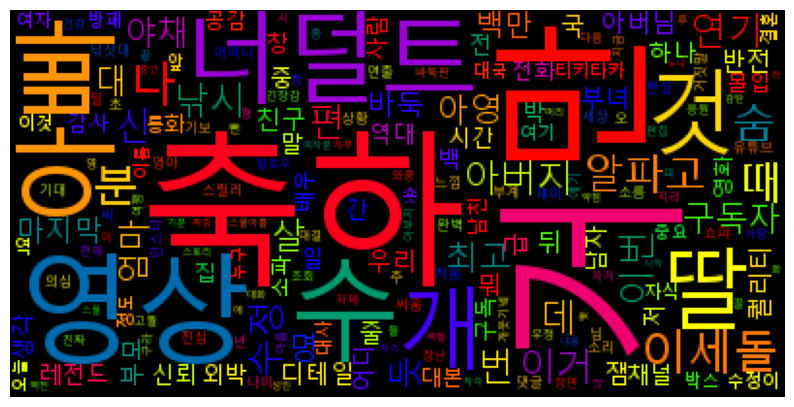

In [108]:
word_cloud = WordCloud(
    font_path='malgun', # 한글 인식 위해.
    colormap='prism',
    max_font_size=100,
).generate_from_frequencies(soojeng_word_count)

plt.figure(figsize=(10,8))
plt.axis('off') 
plt.imshow(word_cloud)
plt.show()

In [109]:
soojeng.words

0                [숨]
1           [아빠, 세뇌]
2              [웃기닼]
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849             [등]
3850              []
3851              []
3852              []
Name: words, Length: 3853, dtype: object

In [120]:
soojeng.words.apply(lambda x: [word for word in x if len(x) > 1])

0                 []
1           [아빠, 세뇌]
2                 []
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849              []
3850              []
3851              []
3852              []
Name: words, Length: 3853, dtype: object

In [128]:
soojeng_word_count = soojeng.words.apply(lambda x: [word for word in x if len(x) > 1]) 

In [ ]:
soojeng_word_count

In [ ]:
soojeng.words

In [131]:
soojeng_word_count = Counter(itertools.chain(*soojeng.words))

In [132]:
def extract_noun_from_kiwi_analyzed(comment):
    try:
        kiwi_analyzed_comment = kiwi.analyze(comment)
    except ValueError:
        return []

    return [
        token.form
        for token
        in kiwi_analyzed_comment[0][0]
        if token.tag.startswith('N') and token.len > 1
    ]


    # 드라이 익셉은 공백에러 해결 위해 추가한 것

In [ ]:
soojeng['words'] = soojeng.refined_comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

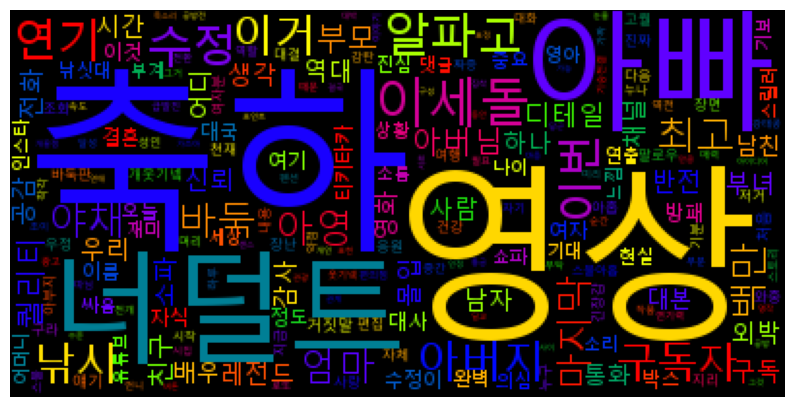

In [134]:
word_cloud = WordCloud(
    font_path='malgun', # 한글 인식 위해.
    colormap='prism',
    max_font_size=100,
).generate_from_frequencies(soojeng_word_count)

plt.figure(figsize=(10,8))
plt.axis('off') 
plt.imshow(word_cloud)
plt.show()

### TFIDF

In [196]:
from sklearn.metrics.pairwise import cosine_similarity

In [173]:
soojeng.words

0                 []
1           [아빠, 세뇌]
2              [웃기닼]
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849              []
3850              []
3851              []
3852              []
Name: words, Length: 3853, dtype: object

In [175]:
soojeng['word_features'] = soojeng.words.apply(lambda x: ' '.join(x))

C:\Users\user\AppData\Local\Temp\ipykernel_7700\4240155390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojeng['word_features'] = soojeng.words.apply(lambda x: ' '.join(x))


In [176]:
soojeng.filter(items=['comments', 'word_features'])

,comments,word_features
0,와 ㅋㅋㅋ ㄹㅇ 숨막힌다 ㅋㅋㅋ,
1,아빠가 세뇌 당함..... ㅋㅋㅋㅋㅋㅋㅋ,아빠 세뇌
2,아 존나 웃기닼ㅋㅋㅋㅋㅋㅋㅋ,웃기닼
3,여자들아 남자 믿지 말고 외박하지마라..,여자 남자 외박
4,"이건 사랑이 아니다. 애비를 죽여라,",이거 사랑 애비
...,...,...
3848,오우,
3849,1등 ^^,
3850,와!,
3851,재밌네요,


In [191]:
documents = [ word_feature for word_feature in soojeng.word_features if word_feature != '' ]

In [192]:
tfidf_soojeng = TfidfVectorizer().fit_transform(documents)

In [193]:
tfidf_soojeng

<2961x2210 sparse matrix of type '<class 'numpy.float64'>'
	with 8310 stored elements in Compressed Sparse Row format>

In [194]:
tfidf_soojeng.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [195]:
tfidf_soojeng.toarray().shape

(2961, 2210)

In [197]:
# 유사 댓글 확인
cos_sim = cosine_similarity(tfidf_soojeng.toarray())

In [199]:
cos_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.73093089],
       [0.        , 0.        , 0.        , ..., 0.        , 0.73093089,
        1.        ]])

In [198]:
cos_sim.shape

(2961, 2961)

In [200]:
np.where(0.9 < cos_sim > 1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [201]:
np.where((0.9 <= cos_sim) & (cos_sim < 1))

(array([  22,   56,   86,  148,  200,  202,  231,  274,  274,  277,  300,
         300,  301,  322,  393,  393,  405,  431,  468,  524,  524,  525,
         562,  584,  584,  602,  628,  629,  633,  645,  687,  722,  818,
         818,  900,  903,  942,  945,  964, 1056, 1058, 1071, 1074, 1098,
        1112, 1117, 1139, 1154, 1218, 1218, 1218, 1227, 1227, 1314, 1369,
        1369, 1409, 1470, 1471, 1477, 1491, 1506, 1549, 1574, 1577, 1663,
        1674, 1685, 1691, 1701, 1719, 1759, 1770, 1774, 1790, 1794, 1833,
        1885, 1900, 1902, 1915, 1927, 1930, 1936, 1951, 1963, 1987, 1987,
        1994, 2007, 2007, 2007, 2026, 2055, 2066, 2088, 2150, 2180, 2181,
        2186, 2189, 2214, 2225, 2247, 2263, 2308, 2341, 2341, 2341, 2351,
        2359, 2418, 2443, 2446, 2467, 2478, 2497, 2526, 2533, 2552, 2562,
        2574, 2579, 2588, 2613, 2627, 2654, 2656, 2657, 2668, 2676, 2711,
        2723, 2727, 2754, 2754, 2760, 2773, 2796, 2807, 2819, 2819, 2819,
        2819, 2819, 2826, 2880, 2880, 

In [202]:
sim_index = np.where((0.9 <= cos_sim) & (cos_sim < 1))

In [205]:
sim_index[0][0], sim_index[1][0]

(22, 2892)

In [206]:
documents[22]

'사람 사람'

In [207]:
documents[2892]

'너덜트 사람 사람'

In [208]:
sim_index[0][2], sim_index[1][2]

(86, 2892)

In [209]:
documents[86]

'사람'

In [210]:
documents[2892]

'너덜트 사람 사람'